In [ ]:
#!pip install prince
#!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load a sample of your data
df = pd.read_csv("FinalDataSetJobOffers.csv").sample(n=1000, random_state=42)


In [ ]:
df.head()

,Job post,Company name,Job description,Required skills,Location,Company rating,Company review,Experience required
23304,senior manag analyt,mirum india,experi digit medium includ excel skill googl a...,tableau manag data studio digit medium sa data...,mumbai,3.30000,30.0,10 yr
5550,senior technic lead data engin,infostretch solut pvt ltd,flexibl shift time accommod deploy critic call...,jira ssi bitbucket sourc tree sql queri itil f...,pune,3.60000,147.0,10 yr
22050,python develop,diver lynx,must hands-on experi python design build maint...,skill python test data scienc machin learn htm...,bangalore/bengaluru,2.90000,63.0,2-6 yr
10902,microsoft activ directori applic develop,accentur,technic experi 1 pki secur certif manag use sc...,busi process consult activ directori microsoft...,bangalore/bengaluru,4.10000,26528.0,4-6 yr
25912,programm,smart system llc,look experienc programm develop websit,higher educ excel php html mysql skill good or...,yerevan armenia,3.95215,147.0,10 yr


In [ ]:
# Check for missing or NaN values
print(df.isna().sum())

# Drop the rows that contain missing or NaN values
df = df.dropna()

# Verify that there are no more missing or NaN values
print(df.isna().sum())

Job post               0
Company name           0
Job description        0
Required skills        0
Location               0
Company rating         0
Company review         0
Experience required    0
dtype: int64
Job post               0
Company name           0
Job description        0
Required skills        0
Location               0
Company rating         0
Company review         0
Experience required    0
dtype: int64


In [ ]:
print(df.dtypes)

Job post                object
Company name            object
Job description         object
Required skills         object
Location                object
Company rating         float64
Company review         float64
Experience required     object
dtype: object


In [ ]:
# Define categorical and numerical column names
cat_cols = ['Job post', 'Company name', 'Job description', 'Required skills', 'Location', 'Experience required']
num_cols = ['Company rating', 'Company review']

In [ ]:
# Perform KMeans clustering on numerical columns
X_num = df[num_cols].values
n_clusters = 5  # determined by elbow method
kmeans_num = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
clusters_num = kmeans_num.fit_predict(X_num)
df['Cluster_num'] = clusters_num


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



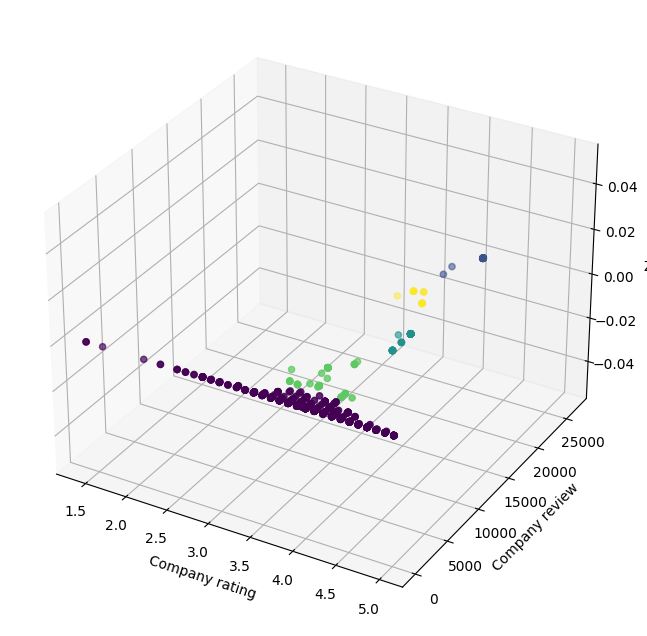

In [ ]:
# Visualize clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_num[:, 0], X_num[:, 1], np.zeros(len(X_num)), c=clusters_num, cmap='viridis')
ax.set_xlabel(num_cols[0])
ax.set_ylabel(num_cols[1])
ax.set_zlabel('Z')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_num, clusters_num)
print("The average silhouette score is:", silhouette_avg)


The average silhouette score is: 0.8832669047412568


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Parcoords(
        line=dict(color=clusters_num, colorscale='Viridis'),
        dimensions=list([
            dict(range=[df[num_cols[0]] .min(),df[num_cols[0]].max()],
                 label=num_cols[0], values=df[num_cols[0]]),
            dict(range=[df[num_cols[1]] .min(),df[num_cols[1]].max()],
                 label=num_cols[1], values=df[num_cols[1]])
        ])
    ))
fig.show()


<Axes: ylabel='Cluster_num'>

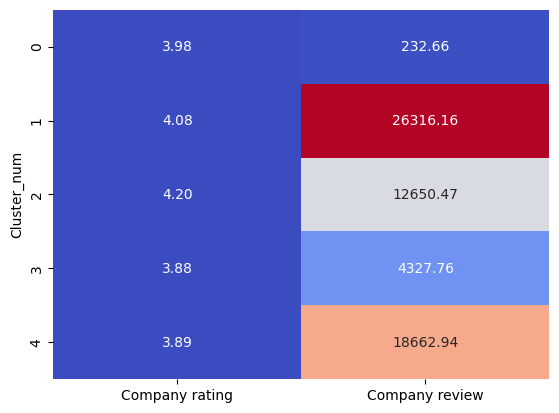

In [ ]:
import seaborn as sns

# Create a pivot table to prepare data for heatmap
heatmap_data = df.pivot_table(index='Cluster_num', values=num_cols)

# Create heatmap
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.2f', cbar=False)


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from category_encoders import TargetEncoder

# Define categorical features
cat_features = ['Job post', 'Company name', 'Job description', 'Required skills', 'Location', 'Experience required']

# Create target encoder and encode categorical features
target_enc = TargetEncoder(cols=cat_features)
data_encoded = target_enc.fit_transform(df[cat_features], df['Company rating'])


In [ ]:
data_encoded.head()

,Job post,Company name,Job description,Required skills,Location,Experience required
23304,3.902741,3.902741,3.902741,3.902741,4.012613,3.974094
5550,3.894771,3.862526,3.941773,3.941773,4.047168,3.974094
22050,3.908790,3.743535,3.850697,3.850697,4.062874,3.974427
10902,4.006828,4.093255,4.006828,4.006828,4.062874,4.041446
25912,3.987113,3.987591,3.987591,3.987591,3.952200,3.974094


In [ ]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_encoded)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

In [ ]:
# Add cluster labels to dataframe
df['Cluster'] = kmeans.labels_

# Print the first 5 rows of the dataframe with cluster labels
print(df.head())

                                       Job post               Company name  \
23304                       senior manag analyt                mirum india   
5550             senior technic lead data engin  infostretch solut pvt ltd   
22050                            python develop                 diver lynx   
10902  microsoft activ directori applic develop                   accentur   
25912                                  programm           smart system llc   

                                         Job description  \
23304  experi digit medium includ excel skill googl a...   
5550   flexibl shift time accommod deploy critic call...   
22050  must hands-on experi python design build maint...   
10902  technic experi 1 pki secur certif manag use sc...   
25912             look experienc programm develop websit   

                                         Required skills             Location  \
23304  tableau manag data studio digit medium sa data...               mumbai   
5550   j

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



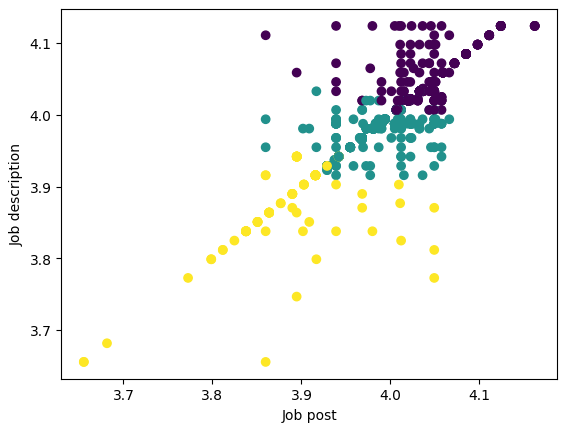

In [ ]:
# Fit and predict cluster labels
clusters = kmeans.fit_predict(data_encoded)

# Plot the clustering result
plt.scatter(data_encoded['Job post'], data_encoded['Job description'], c=clusters)
plt.xlabel('Job post')
plt.ylabel('Job description')
plt.show()

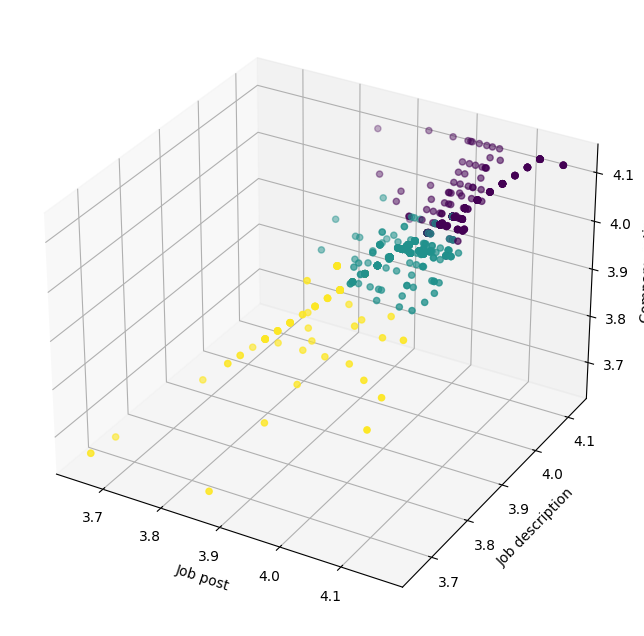

In [ ]:
# Plot the clustering result in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_encoded['Job post'], data_encoded['Job description'], data_encoded['Required skills'], c=clusters)
ax.set_xlabel('Job post')
ax.set_ylabel('Job description')
ax.set_zlabel('Company rating')
plt.show()

In [ ]:
import plotly.express as px

# Add cluster labels to the encoded data
data_encoded['Cluster'] = clusters

# Create parallel coordinate plot
fig = px.parallel_coordinates(data_encoded, color='Cluster')

# Show the plot
fig.show()


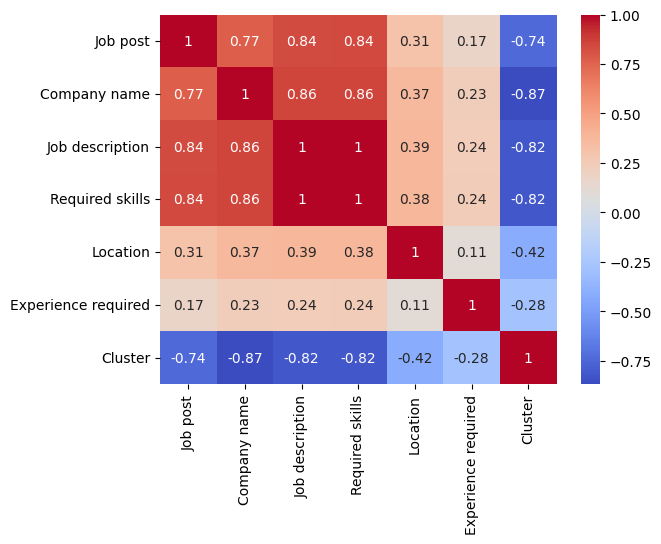

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr = data_encoded.corr()

# Create a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the clustering
silhouette_avg = silhouette_score(data_encoded, clusters)
print("The average silhouette_score is :", silhouette_avg)


The average silhouette_score is : 0.8724664734092024


In [ ]:
# Apply PCA
pca = PCA(n_components=3)
pca.fit(data_encoded)
data_pca = pca.transform(data_encoded)

# Apply k-means clustering on PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

In [ ]:
# Add cluster labels to dataframe
df['Cluster'] = kmeans.labels_

# Print the first 5 rows of the dataframe with cluster labels
print(df.head())

                                       Job post               Company name  \
23304                       senior manag analyt                mirum india   
5550             senior technic lead data engin  infostretch solut pvt ltd   
22050                            python develop                 diver lynx   
10902  microsoft activ directori applic develop                   accentur   
25912                                  programm           smart system llc   

                                         Job description  \
23304  experi digit medium includ excel skill googl a...   
5550   flexibl shift time accommod deploy critic call...   
22050  must hands-on experi python design build maint...   
10902  technic experi 1 pki secur certif manag use sc...   
25912             look experienc programm develop websit   

                                         Required skills             Location  \
23304  tableau manag data studio digit medium sa data...               mumbai   
5550   j

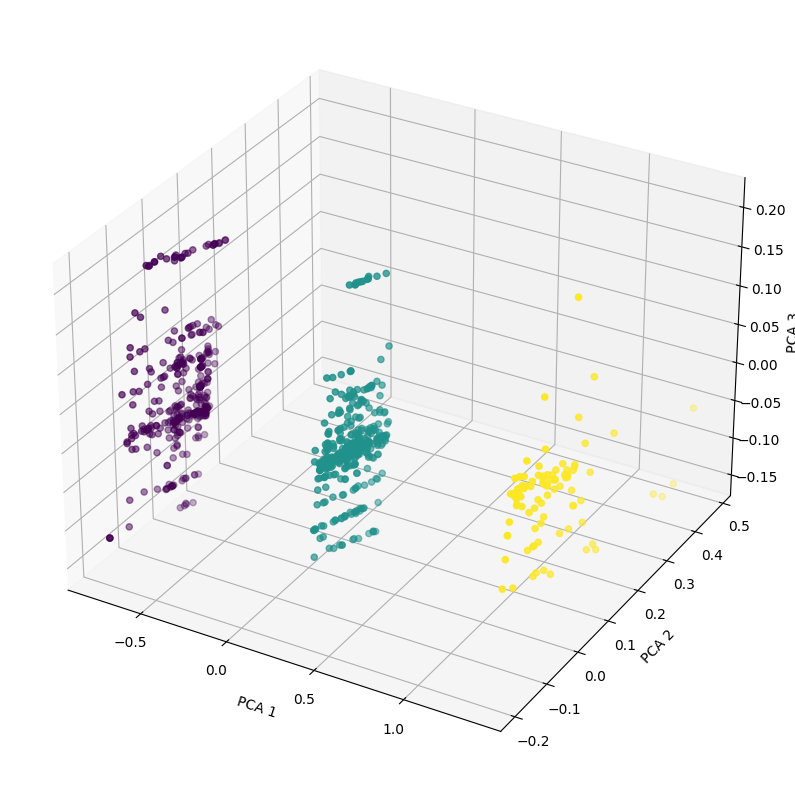

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:,0], data_pca[:,1], data_pca[:,2], c=kmeans.labels_, cmap='viridis')

# Add axis labels
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Show the plot
plt.show()


In [ ]:
import plotly.express as px

# Add PCA components to dataframe
df['PCA 1'] = data_pca[:,0]
df['PCA 2'] = data_pca[:,1]
df['PCA 3'] = data_pca[:,2]

# Create a parallel coordinates plot
fig = px.parallel_coordinates(df, color="Cluster", dimensions=['PCA 1', 'PCA 2', 'PCA 3', 'Company rating'])

# Show the plot
fig.show()
